# Exercise 4: How many clusters of grain?

In the video, you learnt how to choose a good number of clusters for a dataset using the k-means inertia graph.  You are given a dataset of the measurements of samples of grain.  What's a good number of clusters in this case?

This dataset was obtained from the [UCI](https://archive.ics.uci.edu/ml/datasets/seeds).

**Step 1:** Load the dataset _(written for you)_.

In [1]:
import pandas as pd

seeds_df = pd.read_csv('../datasets/seeds.csv')
# forget about the grain variety for the moment - we'll use this later
del seeds_df['grain_variety']

**Step 2:** Display the DataFrame to inspect the data.  Notice that there are 7 columns - so each grain sample (row) is a point in 7D space!  Scatter plots can't help us here.

In [3]:
seeds_df.sample(n=5)

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
185,11.56,13.31,0.8198,5.363,2.683,4.062,5.182
33,13.94,14.17,0.8728,5.585,3.150,2.124,5.012
127,17.98,15.85,0.8993,5.979,3.687,2.257,5.919
45,13.80,14.04,0.8794,5.376,3.155,1.560,4.961
17,15.69,14.75,0.9058,5.527,3.514,1.599,5.046


**Step 3:** Extract the measurements from the DataFrame using its `.values` attribute:

In [4]:
samples = seeds_df.values

**Step 4:**  _(Written for you)_. Measure the quality of clusterings with different numbers of clusters using the
inertia.  For each of the given values of `k`, perform the following steps:

  - Create a `KMeans` instance called `model` with `k` clusters.
  - Fit the model to the grain data `samples`.
  - Append the value of the `inertia_` attribute of `model` to the list `inertias`.

In [15]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
import matplotlib.pyplot as plt

ks = range(1, 8)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(samples)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

**Step 5:**  Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!

The optimum number of clusters is: 3


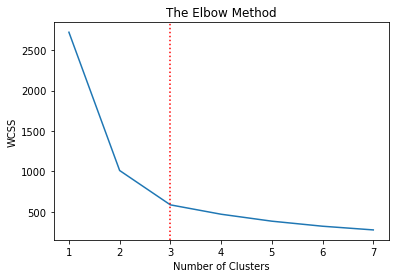

In [16]:
# finding the value of optimal cluster programtically
kn = KneeLocator(range(1,8), inertias, curve='convex', direction='decreasing')
num_cluster = kn.knee
print(f'The optimum number of clusters is: {str(kn.knee)}')

plt.plot(range(1,8), inertias) # plot between WCSS and the number of clusters
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.axvline(num_cluster,linestyle=':', label='no. of clusters', c ="red") # x vertical line
plt.show()


**Excellent work!** You can see from the graph that 3 is a good number of clusters, since these are points where the inertia begins to decrease more slowly.